#MODEL -1
# **AI Screening and Risk Assessment**
# Purpose

- Collect and analyze user data (e.g., health metrics, symptoms, and lifestyle factors).
- Use predictive analytics to flag early warning signs and calculate risk scores.

**Project Assign to :**
- Tiletile Toheebat Yewande
- Balogun Memunat

**Deadline:** 27-Fri-2025
- Please note this notebook is for **Tiletile Toheebat Yewande**

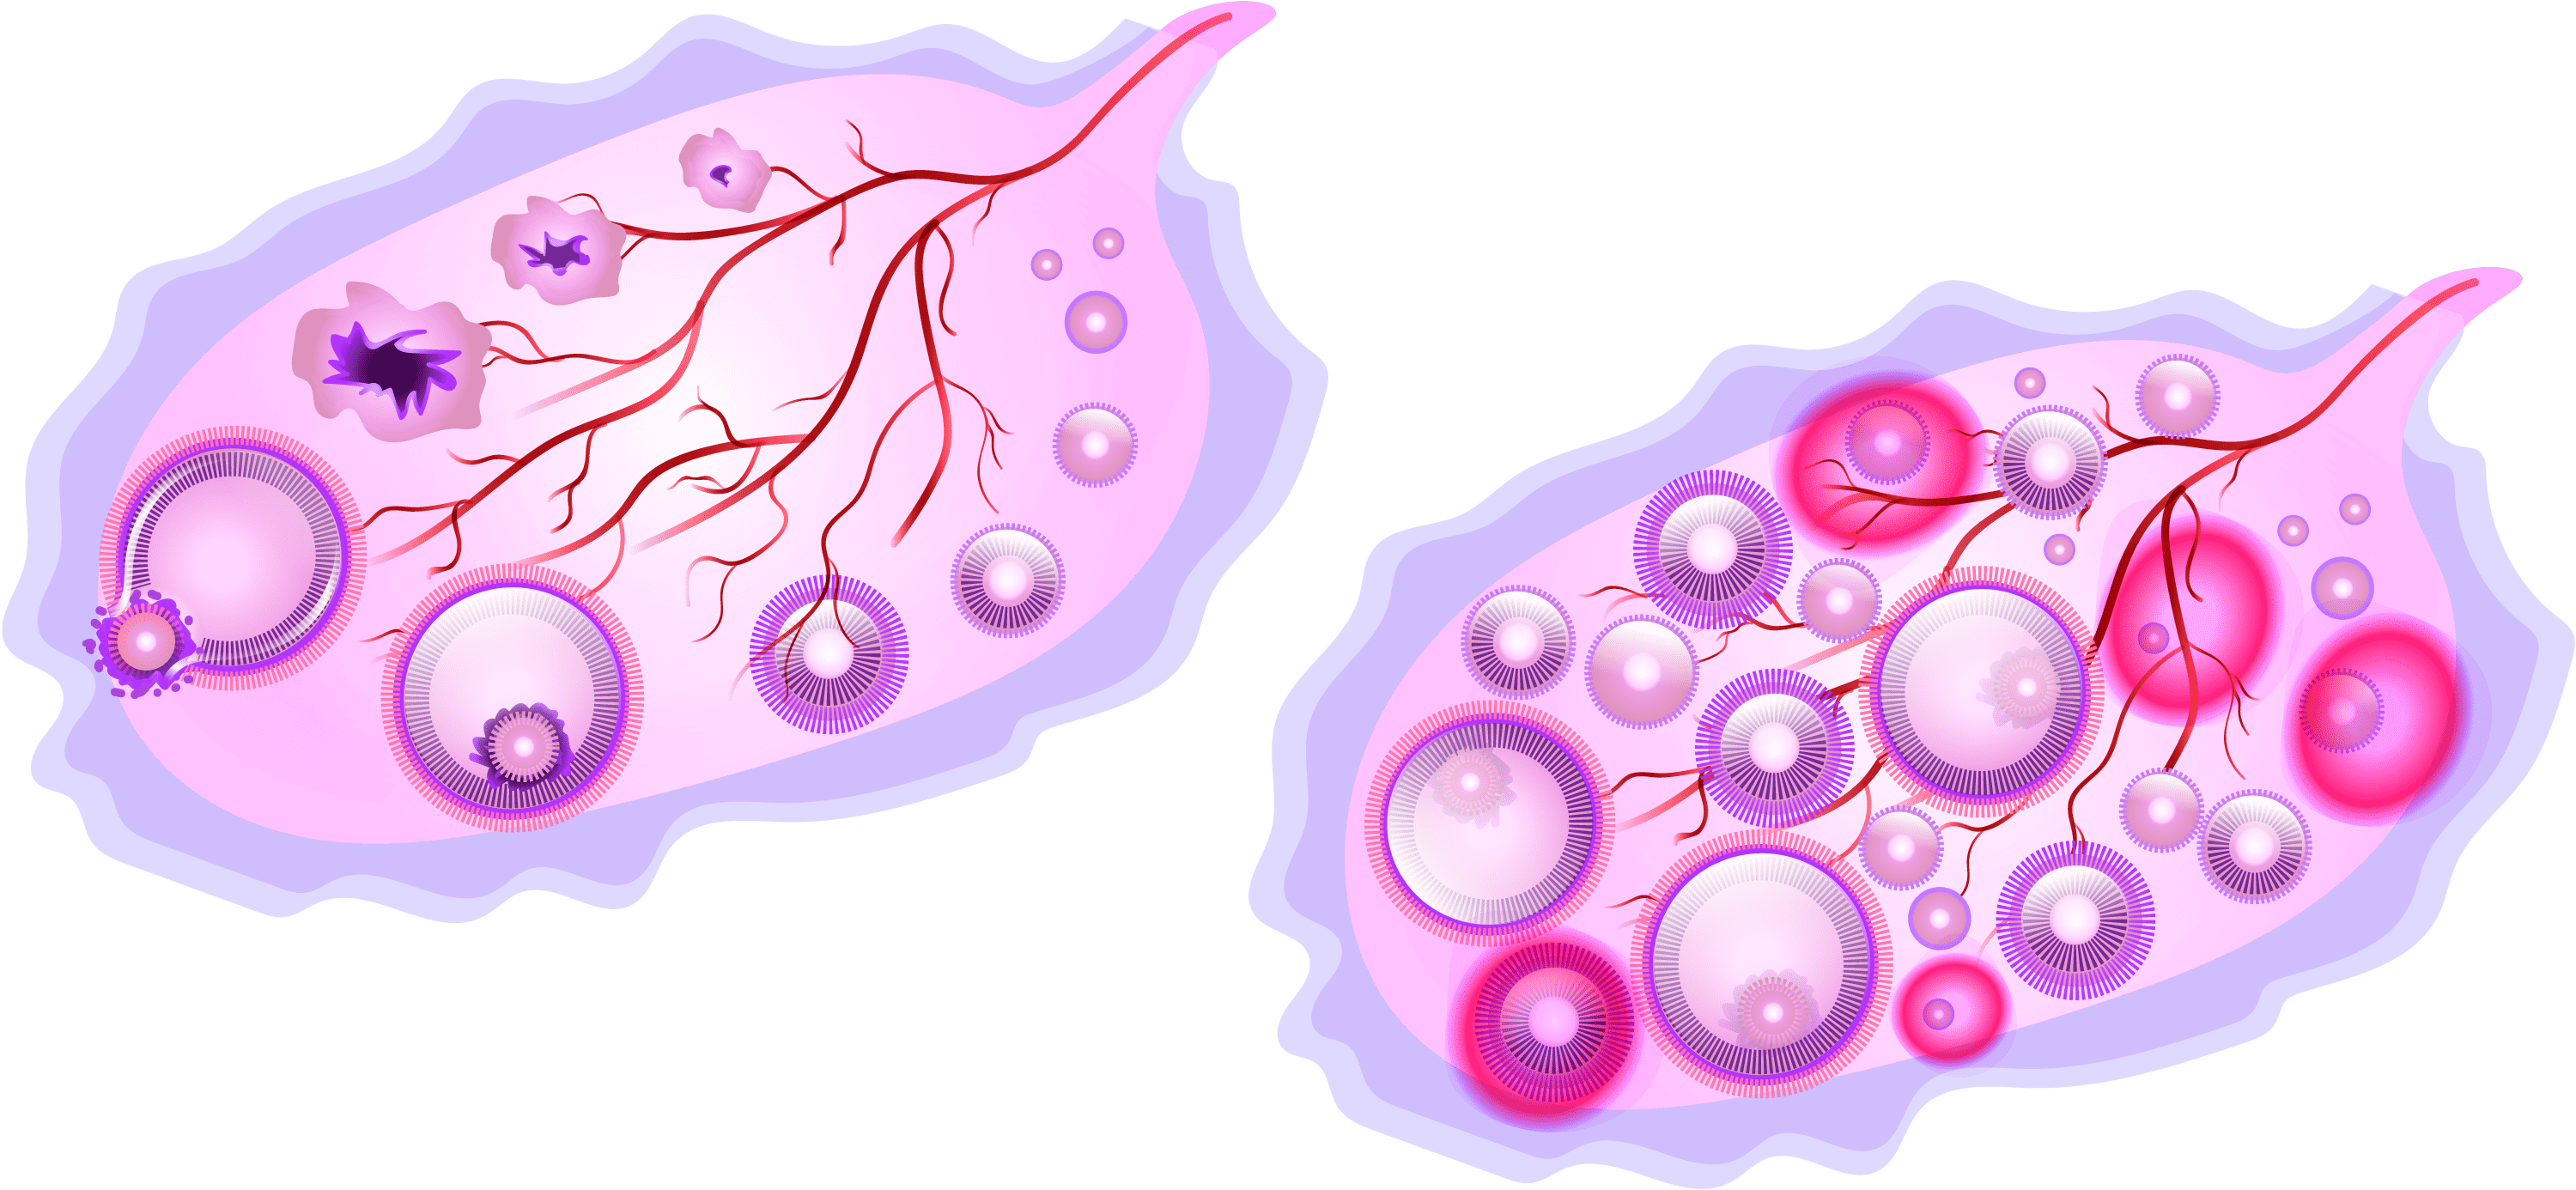

# **Health Metrics Data:**
- Menstrual cycle patterns.
- BMI (Body Mass Index).
- Insulin levels.
- Hormone levels (e.g., testosterone, FSH, LH).
- Algorithm: Logistic Regression

Dataset: https://www.kaggle.com/datasets/shreyasvedpathak/pcos-dataset

## **```LOAD KAGGLE DATA DIRECTLY TO GOOGLE COLAB```**

In [ ]:
#install kaggle python library
!pip install kaggle

In [ ]:
#mount google drive to store Kaggle API crendentials for future
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#make a location directory temporarily for kaggle on colab drive
! mkdir ~/.kaggle

In [ ]:
#copy the kaggle json file path on google drive to the temporary location
! cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
#set permission to read/write to the owner only
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#download the pcos dataset
!kaggle datasets download shreyasvedpathak/pcos-dataset

Dataset URL: https://www.kaggle.com/datasets/shreyasvedpathak/pcos-dataset
License(s): copyright-authors
  0% 0.00/27.5k [00:00<?, ?B/s]
100% 27.5k/27.5k [00:00<00:00, 28.8MB/s]


In [ ]:
#unzip the dataset
!unzip pcos-dataset.zip

Archive:  pcos-dataset.zip
  inflating: PCOS_data.csv           


## **```READ, CHECK AND PREPROCESS DATASET```**

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#read dataset
df = pd.read_csv('PCOS_data.csv')
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Marraige Status (Yrs),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),FSH/LH,Hip(inch),Waist(inch),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.3,15,78,22,10.48,2,5,7.0,0,0,1.99,1.99,7.95,3.68,2.16,36,30,0.83,0.68,2.07,45.16,17.1,0.57,92.0,0,0,0,0,0,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.9,15,74,20,11.70,2,5,11.0,1,0,60.80,1.99,6.73,1.09,6.17,38,32,0.84,3.16,1.53,20.09,61.3,0.97,92.0,0,0,0,0,0,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.3,11,72,18,11.80,2,5,10.0,1,0,494.08,494.08,5.54,0.88,6.30,40,36,0.90,2.54,6.63,10.52,49.7,0.36,84.0,0,0,0,1,1,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.7,13,72,20,12.00,2,5,4.0,0,0,1.99,1.99,8.06,2.36,3.42,42,36,0.86,16.41,1.22,36.90,33.4,0.36,76.0,0,0,0,0,0,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.1,11,72,18,10.00,2,5,1.0,1,0,801.45,801.45,3.98,0.90,4.42,37,30,0.81,3.57,2.26,30.09,43.8,0.38,84.0,0,0,0,1,0,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [ ]:
#chcek data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [ ]:
#fill missing values
df['Marraige Status (Yrs)'] = df['Marraige Status (Yrs)'].fillna(df['Marraige Status (Yrs)'].mode())
df['Fast food (Y/N)'] = df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].mode())

In [ ]:
#drop unnecessary columns
df.drop(columns = ['Sl. No', 'Patient File No.', 'Unnamed: 44'], inplace = True)

In [ ]:
#check unique values
df['AMH(ng/mL)'].unique()

array(['2.07', '1.53', '6.63', '1.22', '2.26', '6.74', '3.05', '1.54',
       '1', '1.61', '4.47', '1.67', '7.94', '2.38', '0.88', '0.69',
       '3.78', '1.92', '2.85', '2.13', '4.13', '2.5', '1.89', '0.26',
       '3.84', '3.56', '1.56', '1.69', '2.34', '1.58', '2.36', '3.64',
       '2.78', '0.33', '2.35', '3.88', '3.55', '4.33', '3.66', '4.5',
       '3.2', '2.1', '6.55', '1.2', '2.33', '3.22', '2.333', '2.31',
       '4.2', '3.21', '2.14', '2.3', '4.6', '5.8', '5.2', '4.63', '1.01',
       '2.58', '0.35', '5.23', '3.68', '2.55', '4.91', '1.03', '6.56',
       '3.91', '5.42', '1.65', '2.06', '1.81', '3.81', '3.65', '8.98',
       '1.7', '3.18', '2.75', '0.86', '2.29', '2.19', '8.46', '4.59',
       '1.04', '4.27', '3.86', '1.42', '10.07', '0.98', '4.07', '3.9',
       '10', '16.9', '17', '21.9', '1.6', '3.3', '21', '12.7', '1.8',
       '3.6', '15', '5', '17.9', '19.8', '9.2', '2.4', '5.14', '0.3',
       '11.48', '19.3', '8.8', '19', '4.3', '1.4', '12.6', '4.8', '17.1',
       '11

In [ ]:
#replace 'a' with mode
df['AMH(ng/mL)'] = df['AMH(ng/mL)'].replace('a', df['AMH(ng/mL)'].mode()[0])

In [ ]:
df['II    beta-HCG(mIU/mL)'] = df['II    beta-HCG(mIU/mL)'].replace('1.99.', 1.99)

In [ ]:
#change datatype
df['AMH(ng/mL)'] = df['AMH(ng/mL)'].astype('float64')
df['II    beta-HCG(mIU/mL)'] = df['II    beta-HCG(mIU/mL)'].astype('float64')

In [ ]:
df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].mode()[0], inplace=True)

<ipython-input-90-31f6926e3ada>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fast food (Y/N)'].fillna(df['Fast food (Y/N)'].mode()[0], inplace=True)


In [ ]:
df.shape

(541, 42)

In [ ]:
df.dtypes

,0
PCOS (Y/N),int64
Age (yrs),int64
Weight (Kg),float64
Height(Cm),float64
BMI,float64
Blood Group,int64
Pulse rate(bpm),int64
RR (breaths/min),int64
Hb(g/dl),float64
Cycle(R/I),int64


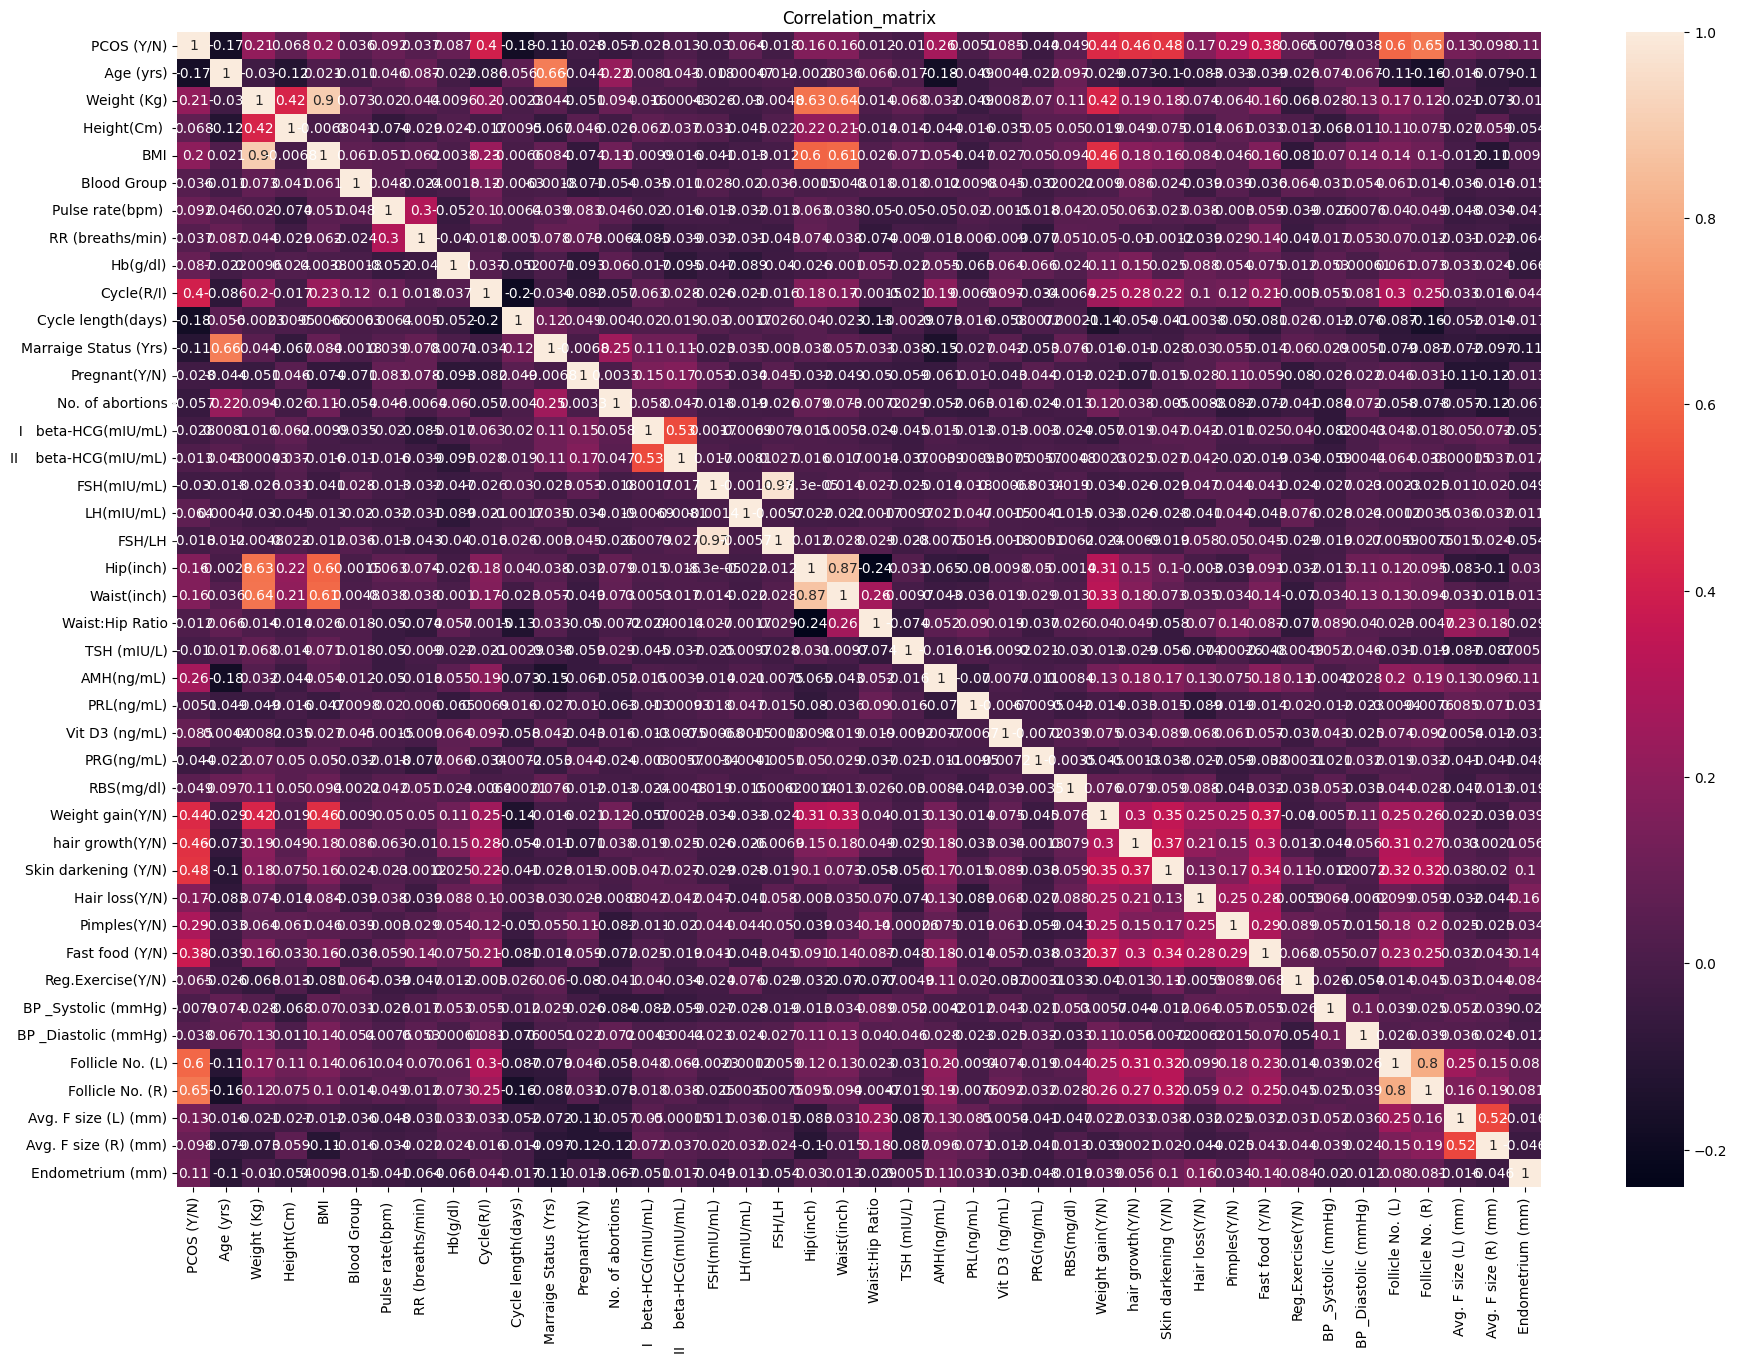

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(22, 15))
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation_matrix')
plt.savefig('correlation_matrix.png')
plt.show()

In [ ]:
#drop highly correlated column and irrelevant columns
pcos_data = df.copy()
pcos_data.drop(columns =['FSH/LH', 'Waist(inch)', 'Hip(inch)', 'Follicle No. (L)', 'Follicle No. (R)', 'Marraige Status (Yrs)', 'Blood Group',
                         'Endometrium (mm)'], axis = 1, inplace = True)
pcos_data.shape

(541, 34)

In [ ]:
pcos_data.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)', 'Pregnant(Y/N)',
       'No. of abortions', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)', 'Fast food (Y/N)',
       'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Avg. F size (L) (mm)',
       'Avg. F size (R) (mm)'],
      dtype='object')

In [ ]:
print(pcos_data.describe())

       PCOS (Y/N)   Age (yrs)  Weight (Kg)  Height(Cm)          BMI  Pulse rate(bpm)   \
count  541.000000  541.000000   541.000000   541.000000  541.000000        541.000000   
mean     0.327172   31.430684    59.637153   156.484835   24.307579         73.247689   
std      0.469615    5.411006    11.028287     6.033545    4.055129          4.430285   
min      0.000000   20.000000    31.000000   137.000000   12.400000         13.000000   
25%      0.000000   28.000000    52.000000   152.000000   21.600000         72.000000   
50%      0.000000   31.000000    59.000000   156.000000   24.200000         72.000000   
75%      1.000000   35.000000    65.000000   160.000000   26.600000         74.000000   
max      1.000000   48.000000   108.000000   180.000000   38.900000         82.000000   

       RR (breaths/min)    Hb(g/dl)  Cycle(R/I)  Cycle length(days)  Pregnant(Y/N)  \
count        541.000000  541.000000  541.000000           541.00000     541.000000   
mean          19.243993   

there are clear outliers in multiple columns. Some of the most obvious ones are:

Pulse Rate (bpm)

Min = 13 (Unrealistically low)
Max = 82 (Normal)
Beta-HCG (mIU/mL)

Max I = 32,460.97 (Very high compared to 75th percentile of 297.21)
Max II = 25,000 (Extremely high compared to 75th percentile of 97.63)
FSH (mIU/mL) & LH (mIU/mL)

FSH Max = 5052 (Extremely high compared to 75th percentile of 6.41)
LH Max = 2018 (Extremely high compared to 75th percentile of 3.68)
TSH (mIU/L)

Max = 65.0 (Very high, normal range is ~0.5 - 5.0)
AMH (ng/mL)

Max = 66 (Very high compared to 75th percentile of 6.9)
Progesterone (PRG)

Max = 85 (Extremely high compared to 75th percentile of 0.45)
RBS (Blood Sugar mg/dL)

Max = 350 (Very high, normal is <140)
Blood Pressure (Systolic & Diastolic)

Systolic Min = 12 (Impossible)
Diastolic Min = 8 (Impossible)

 Pulse Rate (13 bpm) or Blood Pressure (12/8 mmHg)—those would indicate life-threatening conditions.

In [ ]:
# Columns to check for outliers
columns_to_check = [
       'Weight (Kg)', 'Cycle length(days)',
       'No. of abortions', '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)'
]

# Function to cap outliers using the IQR method
def cap_outliers(pcos_data, column):
    Q1 = pcos_data[column].quantile(0.25)
    Q3 = pcos_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Cap outliers
    pcos_data[column] = np.where(pcos_data[column] < lower_limit, lower_limit, pcos_data[column])
    pcos_data[column] = np.where(pcos_data[column] > upper_limit, upper_limit, pcos_data[column])

    return pcos_data

# Apply capping to selected columns
for col in columns_to_check:
    pcos_data = cap_outliers(pcos_data, col)

# Apply log transformation to highly skewed features
log_transform_cols = ['  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)', 'LH(mIU/mL)', 'FSH(mIU/mL)']
for col in log_transform_cols:
    pcos_data[col] = np.log1p(pcos_data[col])  # log1p avoids log(0) error

# Save cleaned data
pcos_data.to_csv("outlier_r_pcos.csv", index=False)

print("Outliers handled and dataset saved as 'outlier_r_pcos.csv'.")


Outliers handled and dataset saved as 'outlier_r_pcos.csv'.


In [ ]:
pcos_data.describe()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),Pregnant(Y/N),No. of abortions,I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),FSH(mIU/mL),LH(mIU/mL),Waist:Hip Ratio,TSH (mIU/L),AMH(ng/mL),PRL(ng/mL),Vit D3 (ng/mL),PRG(ng/mL),RBS(mg/dl),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Avg. F size (L) (mm),Avg. F size (R) (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.0,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,0.327172,31.430684,59.481331,156.484835,24.307579,73.247689,19.243993,11.160037,2.560074,4.847505,0.380776,0.0,3.437505,2.404787,1.719223,1.146791,0.891627,2.642880,1.585706,23.468771,28.597325,0.375935,98.898706,0.377079,0.273567,0.306839,0.452865,0.489834,0.515712,0.247689,114.661738,76.927911,15.018115,15.451701
std,0.469615,5.411006,10.543763,6.033545,4.055129,4.430285,1.688629,0.866904,0.901950,1.065163,0.486027,0.0,2.240600,1.818081,0.388676,0.558142,0.046135,1.611111,0.671096,11.687101,11.477299,0.158948,13.141931,0.485104,0.446202,0.461609,0.498234,0.500359,0.500216,0.432070,7.384556,5.574112,3.566839,3.318848
min,0.000000,20.000000,32.500000,137.000000,12.400000,13.000000,16.000000,8.500000,2.000000,2.500000,0.000000,0.0,0.832909,0.688135,0.190620,0.019803,0.760000,0.040000,0.095310,0.400000,0.250000,0.047000,69.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000
25%,0.000000,28.000000,52.000000,152.000000,21.600000,72.000000,18.000000,10.500000,2.000000,4.000000,0.000000,0.0,1.095273,1.095273,1.458615,0.703098,0.860000,1.480000,1.101940,14.520000,20.800000,0.250000,92.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,110.000000,70.000000,13.000000,13.000000
50%,0.000000,31.000000,59.000000,156.000000,24.200000,72.000000,18.000000,11.000000,2.000000,5.000000,0.000000,0.0,3.044522,1.095273,1.766442,1.193922,0.890000,2.260000,1.547563,21.920000,25.900000,0.320000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,110.000000,80.000000,15.000000,16.000000
75%,1.000000,35.000000,65.000000,160.000000,26.600000,74.000000,20.000000,11.700000,4.000000,5.000000,1.000000,0.0,5.697798,4.591375,2.002830,1.543298,0.930000,3.570000,2.066863,29.890000,34.500000,0.450000,107.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,120.000000,80.000000,18.000000,18.000000
max,1.000000,48.000000,84.500000,180.000000,38.900000,82.000000,28.000000,14.800000,5.000000,6.500000,1.000000,0.0,6.608055,5.489310,2.491137,2.159869,0.980000,6.705000,2.723595,52.945000,55.050000,0.750000,129.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,140.000000,100.000000,24.000000,24.000000


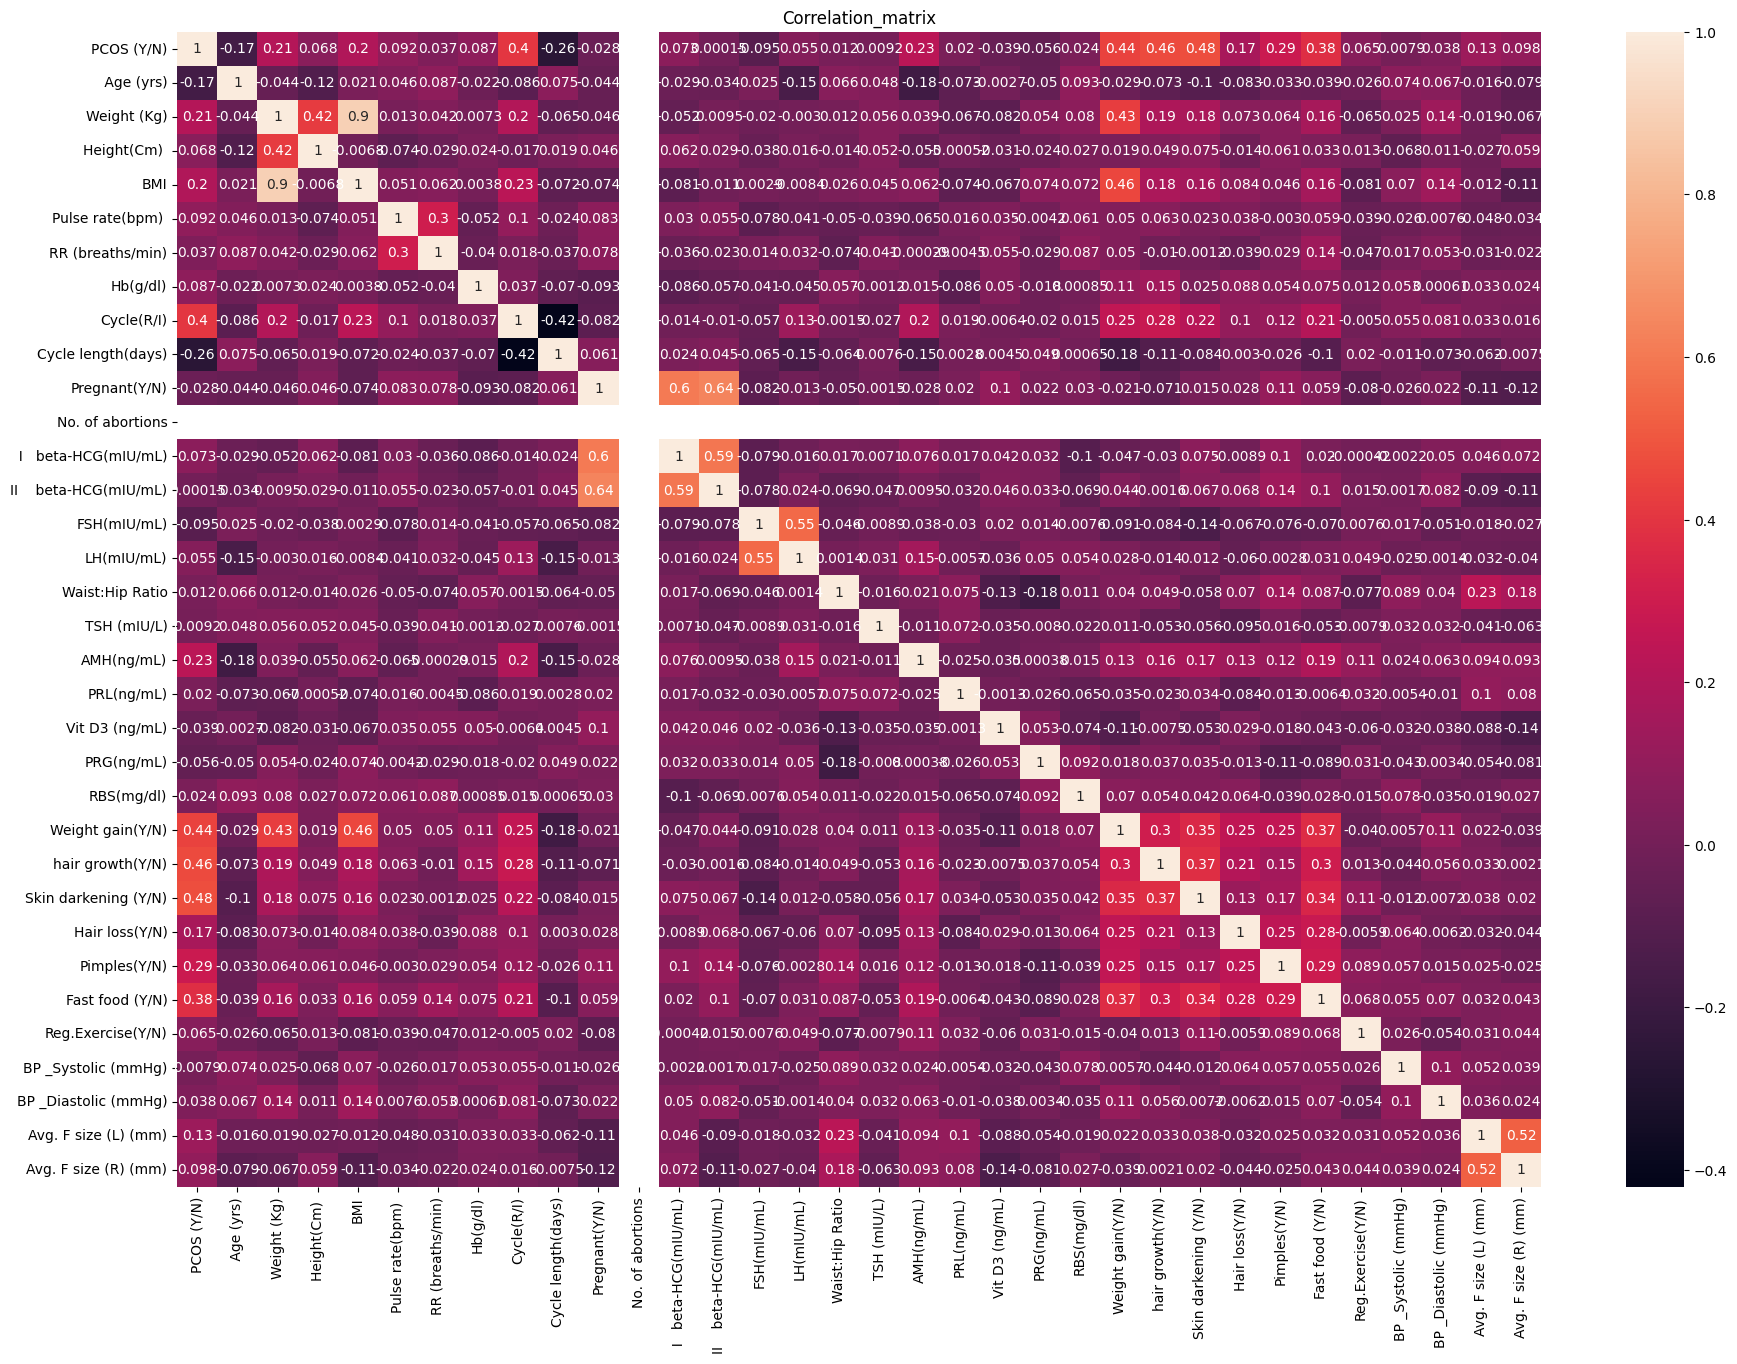

In [ ]:
corr_matrix1 = pcos_data.corr()
plt.figure(figsize=(22, 15))
sns.heatmap(corr_matrix1, annot=True)
plt.title('Correlation_matrix')
plt.show()

## **```EXPLORATORY DATA ANALYSIS```**

In [ ]:
pcos_data['PCOS (Y/N)'].value_counts()

,count
PCOS (Y/N),
0,364
1,177


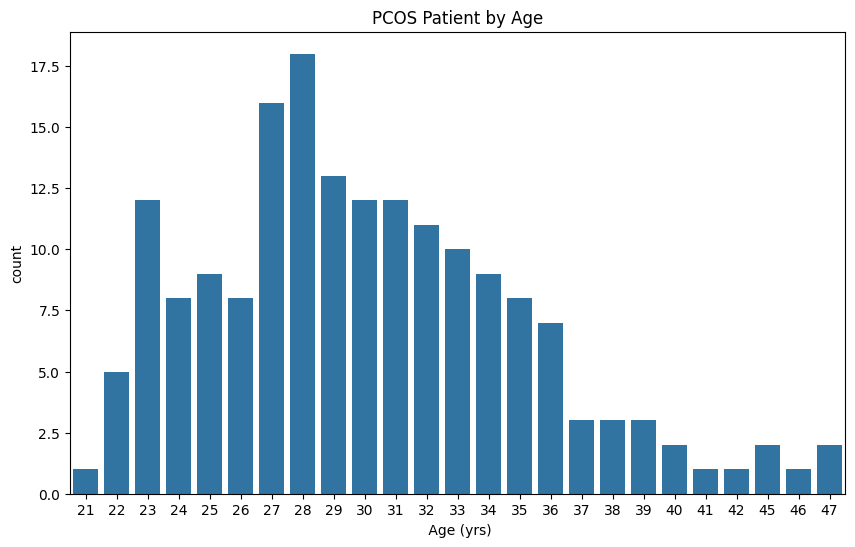

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=' Age (yrs)', data = pcos_data[pcos_data['PCOS (Y/N)'] == 1])
plt.title('PCOS Patient by Age');

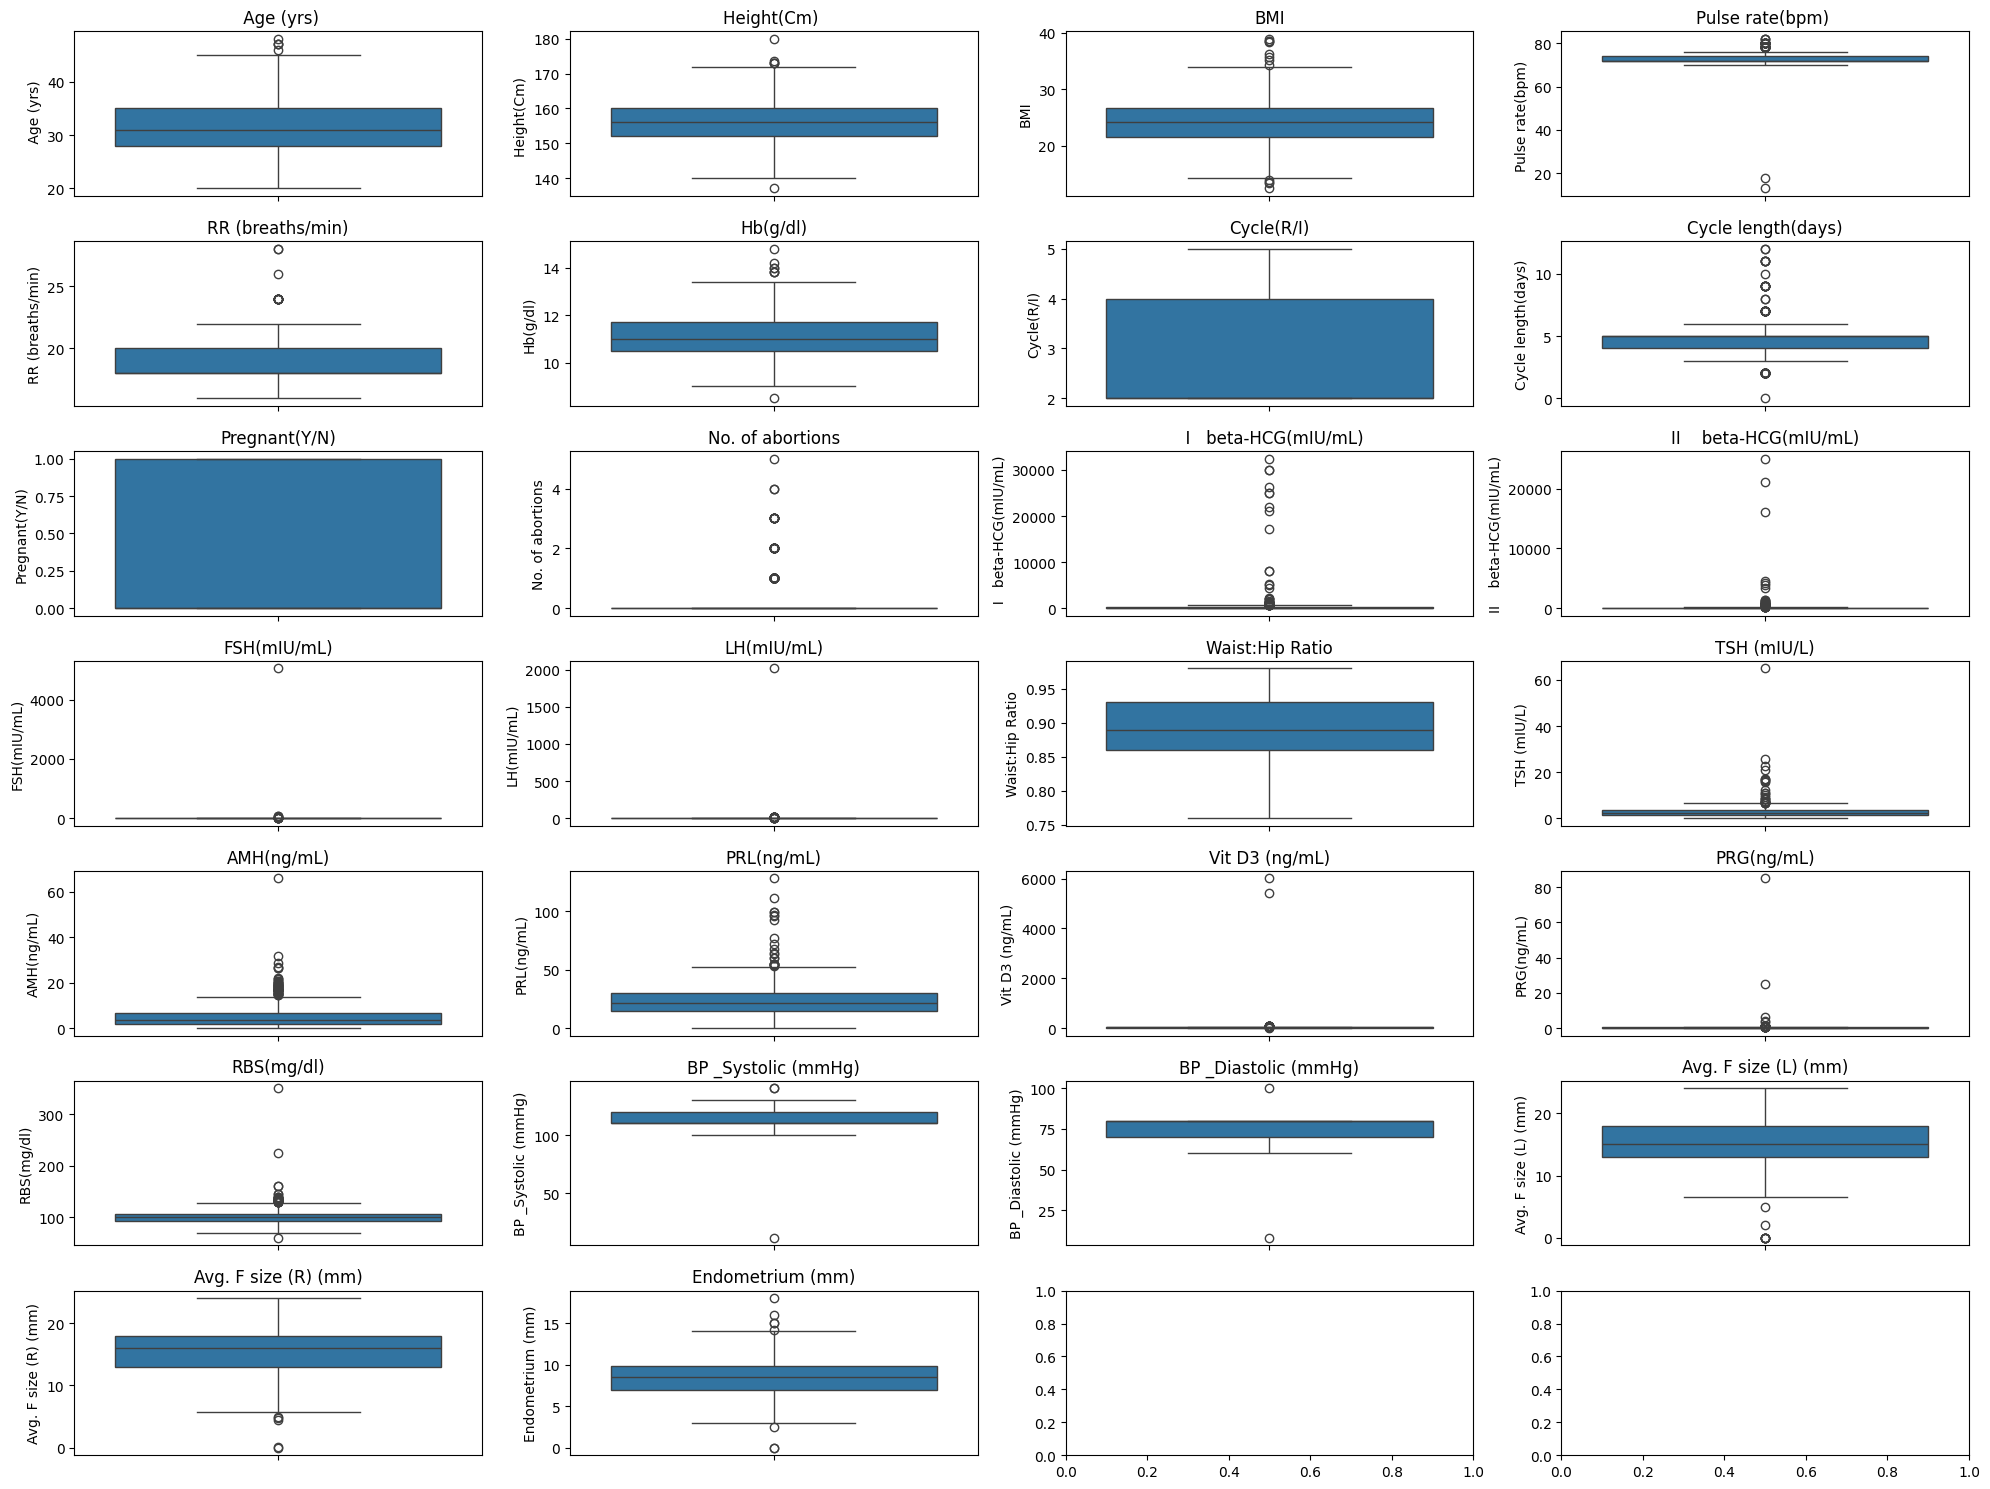

In [ ]:
columns_to_plot = [' Age (yrs)', 'Height(Cm) ', 'BMI', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Pregnant(Y/N)', 'No. of abortions', '  I   beta-HCG(mIU/mL)',
       'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)', 'LH(mIU/mL)',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)',
       'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Avg. F size (L) (mm)',
       'Avg. F size (R) (mm)', 'Endometrium (mm)']

fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=pcos_data[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()


<ipython-input-56-a27e0f744675>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pcos_data[col], ax=axes[i], palette="coolwarm")
<ipython-input-56-a27e0f744675>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pcos_data[col], ax=axes[i], palette="coolwarm")
<ipython-input-56-a27e0f744675>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=pcos_data[col], ax=axes[i], palette="coolwarm")
<ipython-input-56-a27e0f744675>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign t

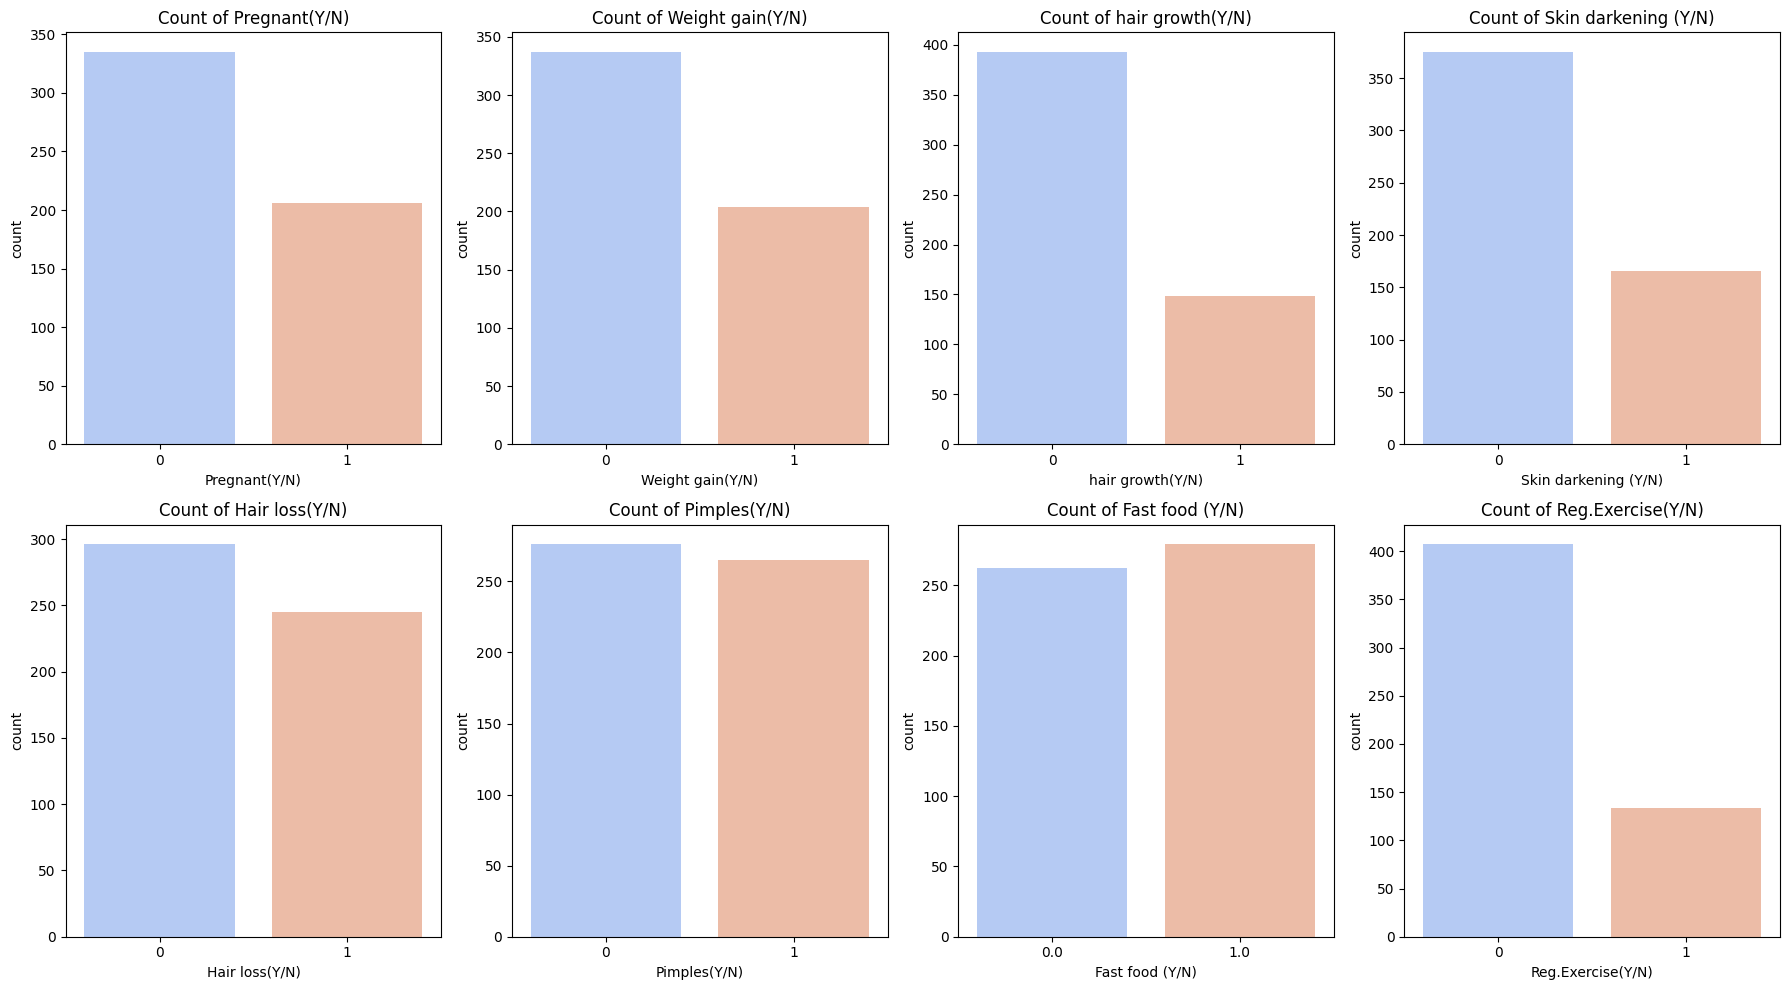

In [ ]:
columns_to_plot1 = ['Pregnant(Y/N)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot1):
    sns.countplot(x=pcos_data[col], ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"Count of {col}")

plt.tight_layout()
plt.show()


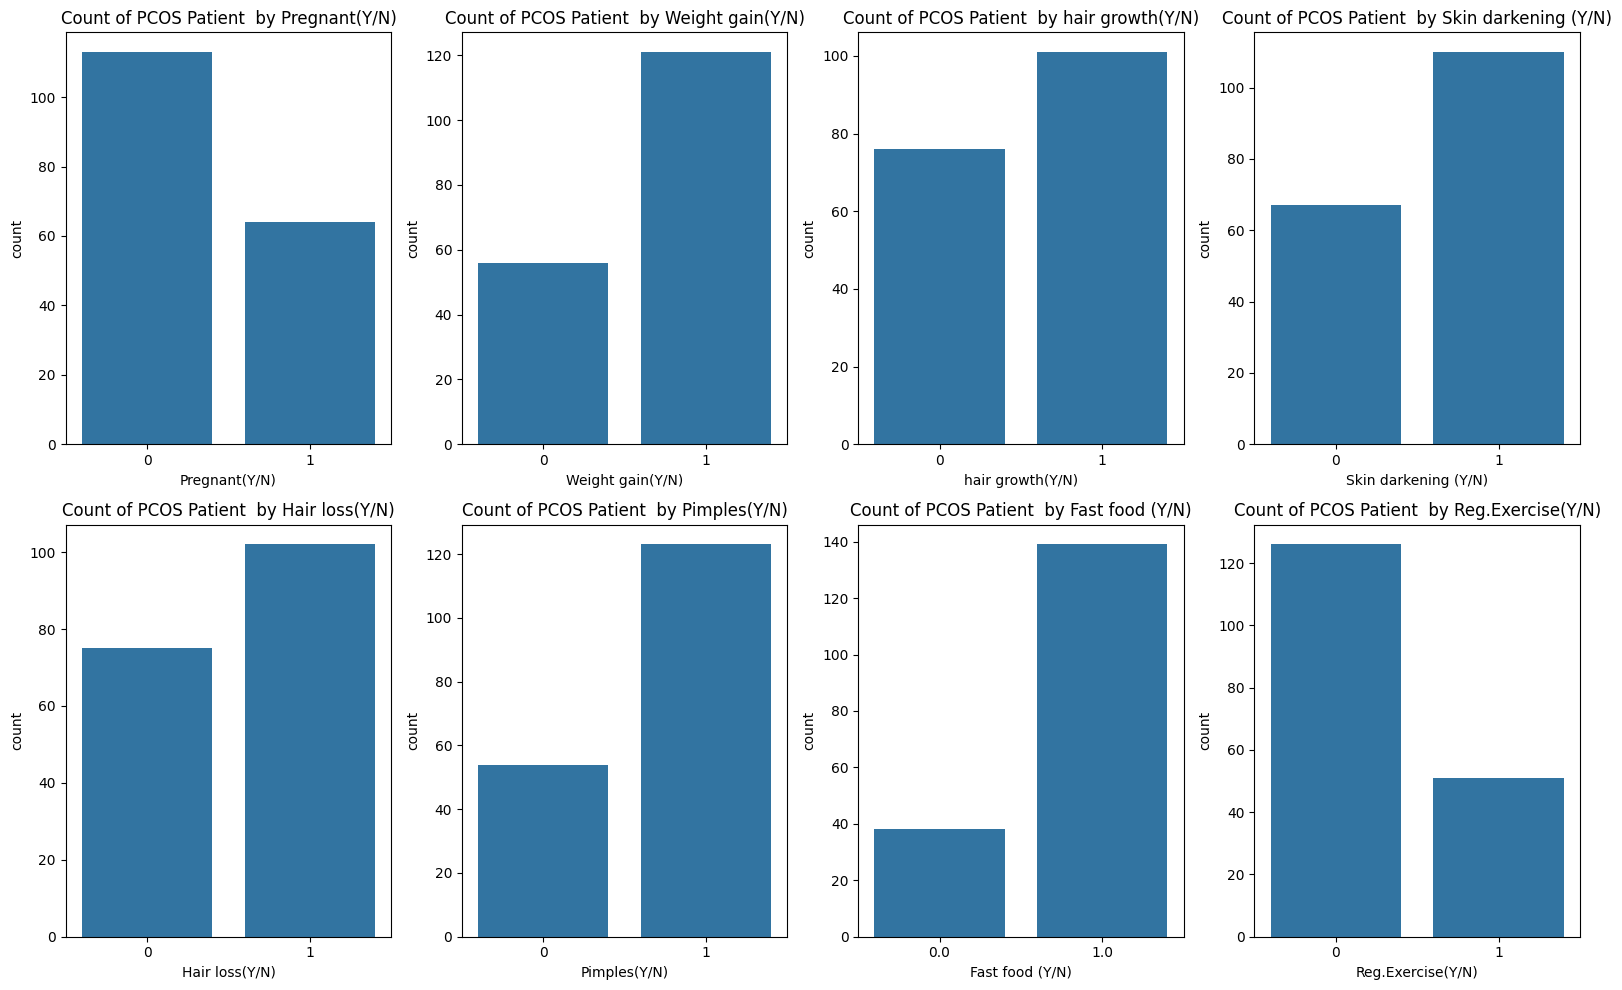

In [ ]:
columns_to_plot2 = ['Pregnant(Y/N)', 'Weight gain(Y/N)',
       'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)',
       'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot2):
    sns.countplot(x=pcos_data[pcos_data['PCOS (Y/N)']==1][col], ax=axes[i])
    axes[i].set_title(f"Count of PCOS Patient  by {col}")

plt.tight_layout()
plt.show()

## **```MODEL BUILDING```**

``PCOS DETETCTOR``

In [ ]:
#import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
#define features
x = pcos_data.drop(columns = ['PCOS (Y/N)', 'No. of abortions'])
y = pcos_data['PCOS (Y/N)'] #target variable

In [ ]:
#split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print("Training data shape -", "x:", X_train.shape, ", y:", y_train.shape)
print("Testing data shape - ", "x:", X_test.shape, ", y:", y_test.shape)

Training data shape - x: (432, 32) , y: (432,)
Testing data shape -  x: (109, 32) , y: (109,)


Model: **Logistc Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
#stadardiez features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train Logistic Regression model
l_regressor = LogisticRegression(max_iter=100, random_state=42)
l_regressor.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Make predictions
y_pred = l_regressor.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.8807


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        77
           1       0.85      0.72      0.78        32

    accuracy                           0.88       109
   macro avg       0.87      0.83      0.85       109
weighted avg       0.88      0.88      0.88       109



 Model: **RandomForestClassifier**

In [ ]:
#initialize model
model = RandomForestClassifier(n_estimators=100, random_state=42)

#train model
model.fit(X_train, y_train)

#make predictions
y_predf = model.predict(X_test)

#evaluate model
accuracy = round((accuracy_score(y_test, y_predf)), 2)
print(f"This model is {accuracy} accurate")

This model is 0.83 accurate


In [ ]:
print(classification_report(y_test, y_predf))

              precision    recall  f1-score   support

           0       0.83      0.95      0.88        77
           1       0.81      0.53      0.64        32

    accuracy                           0.83       109
   macro avg       0.82      0.74      0.76       109
weighted avg       0.82      0.83      0.81       109



MODEL - XGBOOST

In [ ]:
import xgboost as xgb

# Binary classification

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

xgb_model.fit(X_train, y_train)  # Train model


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:24:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
#predict
y_pred1 = xgb_model.predict(X_test)

#evaluation
print("Accuracy:", accuracy_score(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

Accuracy: 0.8165137614678899
              precision    recall  f1-score   support

           0       0.85      0.90      0.87        77
           1       0.71      0.62      0.67        32

    accuracy                           0.82       109
   macro avg       0.78      0.76      0.77       109
weighted avg       0.81      0.82      0.81       109



## **```FEATURE IMPORTANCE```**

In [ ]:
# Get the absolute values of the coefficients
l_Importance = np.abs(l_regressor.coef_[0])  # l_regressor is your trained model

# Create a DataFrame for visualization
l_df = pd.DataFrame({'Feature': x.columns, 'Importance': l_Importance})

# Sort features by importance
l_df = l_df.sort_values(by='Importance', ascending=False)

print(l_df)


                   Feature  Importance
22        hair growth(Y/N)    0.700665
23    Skin darkening (Y/N)    0.653234
21        Weight gain(Y/N)    0.643853
7               Cycle(R/I)    0.455054
0                Age (yrs)    0.455053
30    Avg. F size (L) (mm)    0.440355
25            Pimples(Y/N)    0.436149
11  II    beta-HCG(mIU/mL)    0.407183
10    I   beta-HCG(mIU/mL)    0.355538
15             TSH (mIU/L)    0.304755
1              Weight (Kg)    0.296843
8       Cycle length(days)    0.295772
4         Pulse rate(bpm)     0.278917
3                      BMI    0.249636
26         Fast food (Y/N)    0.237782
31    Avg. F size (R) (mm)    0.222951
12             FSH(mIU/mL)    0.204025
19              PRG(ng/mL)    0.195038
18          Vit D3 (ng/mL)    0.181378
27       Reg.Exercise(Y/N)    0.165366
24          Hair loss(Y/N)    0.163125
29    BP _Diastolic (mmHg)    0.155953
5         RR (breaths/min)    0.132561
14         Waist:Hip Ratio    0.124699
16              AMH(ng/mL

 Key Insights from Feature Importance:
Most Important Features:

Hair growth (0.70) → Strongest predictor of PCOS.
Skin darkening (0.65) → Highly correlated with PCOS.
Weight gain (0.64) → Significant factor in PCOS risk.
Irregular Cycles (0.45) → Strongly affects PCOS likelihood.
Age (0.45) → Affects PCOS risk.
Follicle size (0.44) → PCOS patients often have enlarged follicles.
Moderate Importance:

Hormonal markers (Beta-HCG, TSH, FSH, LH, PRG) indicate hormonal imbalances linked to PCOS.
BMI, Pulse rate, and Waist-to-Hip Ratio reflect metabolic health.
Pimples & Fast Food Consumption → Lifestyle-related factors.
Least Important Features:

Pregnancy history (0.018) has minimal impact.
Blood pressure (0.017-0.15) has little significance.
Hemoglobin (0.013) is the least influential.


In [ ]:
# Select top 15 important features
top_15_features = [
    "hair growth(Y/N)", "Skin darkening (Y/N)", "Weight gain(Y/N)",
    "Cycle(R/I)", " Age (yrs)", "Avg. F size (L) (mm)", "Pimples(Y/N)",
    "II    beta-HCG(mIU/mL)", "  I   beta-HCG(mIU/mL)", "TSH (mIU/L)",
    "Weight (Kg)", "Cycle length(days)", "Pulse rate(bpm) ", "BMI",
    "Fast food (Y/N)"
]

# Define X and Y
X = pcos_data[top_15_features]
Y = pcos_data["PCOS (Y/N)"]  # Target variable

# Split into training and testing sets
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train1_scaled = scaler.fit_transform(X_train1)
X_test1_scaled = scaler.transform(X_test1)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train1_scaled, Y_train1)

# Make predictions
y_pred1 = model.predict(X_test1_scaled)

# Calculate accuracy
accuracy = accuracy_score(Y_test1, y_pred1)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.8807


In [ ]:
print(classification_report(Y_test1, y_pred1))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        77
           1       0.85      0.72      0.78        32

    accuracy                           0.88       109
   macro avg       0.87      0.83      0.85       109
weighted avg       0.88      0.88      0.88       109



### other models

**Random Forest Importance**

<ipython-input-48-a48b336f3f7c>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=rf_df, palette="viridis")


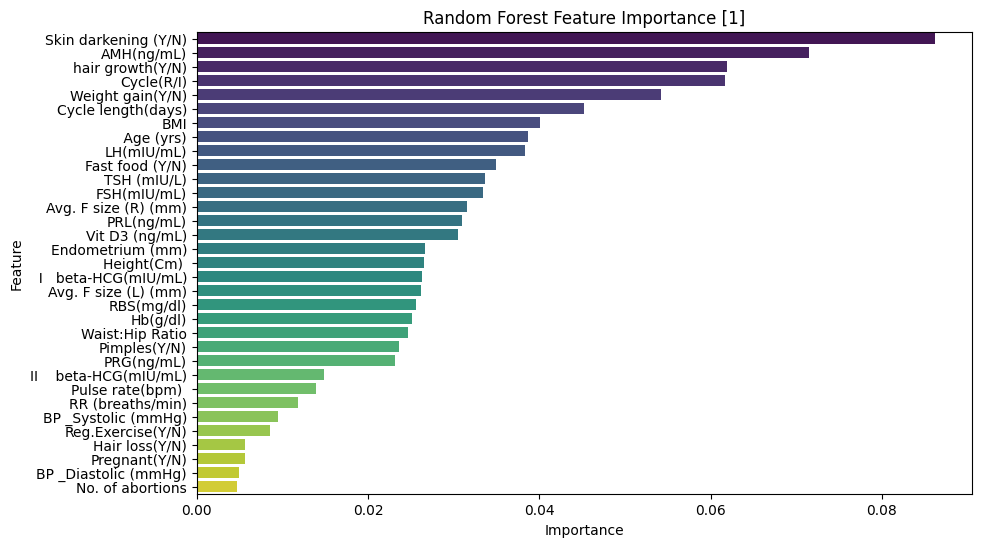

In [ ]:
#random forest model - gini importance
rf_Importance = model.feature_importances_
rf_df = pd.DataFrame({'Feature': x.columns, 'Importance': rf_Importance})
rf_df = rf_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=rf_df, palette="viridis")
plt.title("Random Forest Feature Importance [1]")
plt.show()

Gini Importance measures how much each feature **reduces uncertainty** (or impurity) in the model’s predictions.

**🔹 Key Observations**
1. **Most Important Features** (Highest Gini Importance)  
   - **Skin darkening (Y/N) → 0.083135**  
   - **AMH (ng/mL) → 0.068923**  
   - **Cycle Regularity (R/I) → 0.064429**  
   - **Hair growth (Y/N) → 0.061830**  
   - **Weight gain (Y/N) → 0.053773**  

   ✅ These features strongly influence the model’s ability to **differentiate between classes** (e.g., PCOS vs. non-PCOS).  
   ✅ **Clinical relevance:** Many of these are symptoms or indicators of **PCOS**, which aligns with medical knowledge.  

2. **Moderately Important Features**  
   - **Cycle length (days), BMI, Age, Fast food consumption, Hormonal levels (LH, FSH, PRL, TSH, etc.)**  
   - These features still contribute to the model but are **less dominant** than the top five.  

3. **Least Important Features (Low Gini Importance)**  
   - **Pregnant (Y/N), Hair loss (Y/N), BP (Systolic/Diastolic), No. of abortions, Regular Exercise (Y/N)**  
   - These features had **little impact** on model decision-making.  
   - **Possible reasons:**  
     - They might not be directly related to **PCOS diagnosis**.  
     - The dataset may contain **imbalanced or insufficient** information for these features.  

<ipython-input-49-350c66083a2a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=rf_perm_df, palette="viridis")


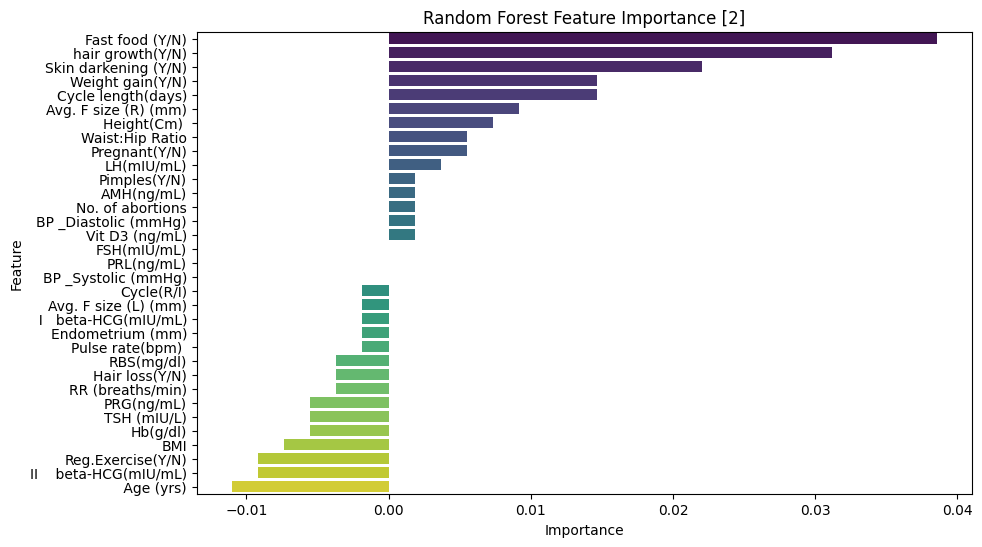

In [ ]:
 # Random Forest Model - Permutation importance
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(model, X_test, y_test)
rf_perm_df = pd.DataFrame({"Feature": x.columns, "Importance": perm_importance.importances_mean})
rf_perm_df = rf_perm_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=rf_perm_df, palette="viridis")
plt.title("Random Forest Feature Importance [2]")
plt.show()

This table shows the **Permutation Importance** scores from a **Random Forest model**, ranking features based on their contribution to the model’s predictions.

**🔹 Key Observations from the Table**
1. **Most Important Features:**  
   - **Hair growth (Y/N) → 0.168807** (Strongest predictor of the target variable)  
   - **Weight gain (Y/N) → 0.031193**  
   - **Fast food (Y/N) → 0.025688**  

   🔥 These features, when shuffled, caused the **largest drop in model accuracy**, meaning they contribute significantly to predictions.  

2. **Moderately Important Features:**  
   - **Skin darkening (Y/N) → 0.014679**  
   - **Cycle length (days) → 0.009174**  
   - **Waist:Hip Ratio → 0.009174**  

   ✅ These features still have an impact, but less than the top three.  

3. **Least Important Features (Near Zero Impact):**  
   - **Pregnant (Y/N), RBS (mg/dl), Age, Vitamin D3, Blood Pressure, Endometrium, Hormonal Levels (TSH, LH, PRL, AMH, etc.)**  
   - These features have **zero importance**, meaning when shuffled, they **did not affect model performance**. The model likely didn’t rely on them for predictions.  

4. **Negative Importance Scores:**  
   - **Hair loss (Y/N) → -0.001835**  
   - **AMH (ng/mL) → -0.005505**  
   - **Pimples (Y/N) → -0.007339**  

   ❌ A **negative score** suggests these features **added noise** rather than useful information. When shuffled, they **slightly improved model accuracy**, meaning the model might have been overfitting to these variables.  

**🔹 Interpretation:**
- **PCOS Prediction is Strongly Influenced by:**  
  - **Hair growth, weight gain, fast food consumption, and skin darkening**  
  - These align with known **clinical symptoms of PCOS**, making them biologically relevant.  

- **Features with Zero or Negative Impact:**  
  - Some features like **hormonal levels, blood pressure, and BMI** surprisingly had **no impact**.  
  - This could be due to **redundant information**, **measurement errors**, or **lack of direct correlation with the target variable**.  

**🔹 ```Comparison of Gini Importance with Permutation Importance```**
1. **Some key differences:**
   - **Hair growth (Y/N)** was the most important feature in **Permutation Importance** but is ranked 4th here in gini importance.
   - **AMH (ng/mL)** had **zero importance** in Permutation Importance but ranks **2nd in Gini Importance.**
   - **BMI & Age** were ignored in Permutation Importance but are somewhat important in Gini Importance.

2. **The Difference**
   - **Permutation Importance** measures the **impact of shuffling each feature** on prediction accuracy.  
   - **Gini Importance** reflects how often a feature is used to **split decision nodes** in the trees.  
   - If a feature is **correlated** with others, it may appear **less important** in **Permutation Importance** because removing it doesn't change much.   


**xgboost Importance**

<ipython-input-50-7b895db73117>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=xgb_df, palette="viridis")


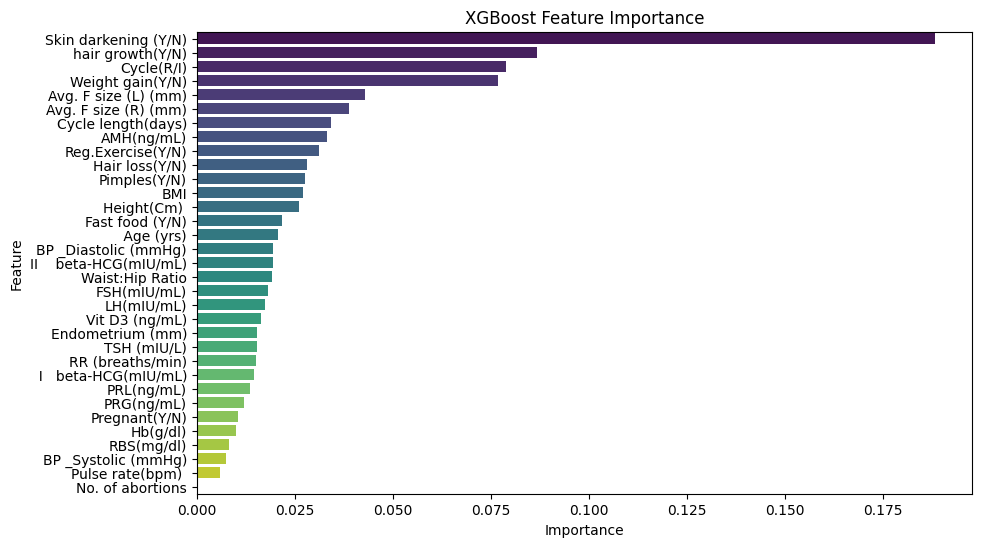

In [ ]:
#xgboost model
xgb_Importance = xgb_model.feature_importances_
xgb_df = pd.DataFrame({'Feature': x.columns, 'Importance': xgb_Importance})
xgb_df = xgb_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=xgb_df, palette="viridis")
plt.title("XGBoost Feature Importance")
plt.show()

XGBoost calculates feature importance using **gain, cover, or frequency** metrics. This likely represent **gain**, which measures how much a feature improves the model’s decision-making at each split.

---

**🔹 Key Observations**
1. **Most Important Features (Top 5)**
   - **Skin darkening (Y/N) → 0.1810** 🔥 *(Most important feature!)*
   - **Hair growth (Y/N) → 0.0867**
   - **Cycle Regularity (R/I) → 0.0853**
   - **Weight gain (Y/N) → 0.0781**
   - **Avg. Follicle Size (L) (mm) → 0.0441**

   ✅ **Clinical Relevance:**  
   - The **top 4** features are **symptoms commonly linked to PCOS** (Polycystic Ovary Syndrome).  
   - Follicle size is **important in reproductive health**, influencing diagnosis.  

2. **Moderately Important Features**
   - **AMH (Anti-Müllerian Hormone) → 0.0345** *(Important for ovarian reserve assessment.)*  
   - **Hair loss, Cycle length, Regular Exercise, Pimples, BMI, and LH levels** all contribute moderately.  

3. **Least Important Features**
   - **Pregnant (Y/N) → 0.0023** *(Minimal impact on prediction.)*  
   - **No. of Abortions → 0.0000** *(Not used in splits at all!)*  
   - Features like **BP, Vitamin D, Pulse Rate, and β-HCG levels** had very low importance.  

<ipython-input-51-2c17af7af5be>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=xgb_perm_df, palette="viridis")


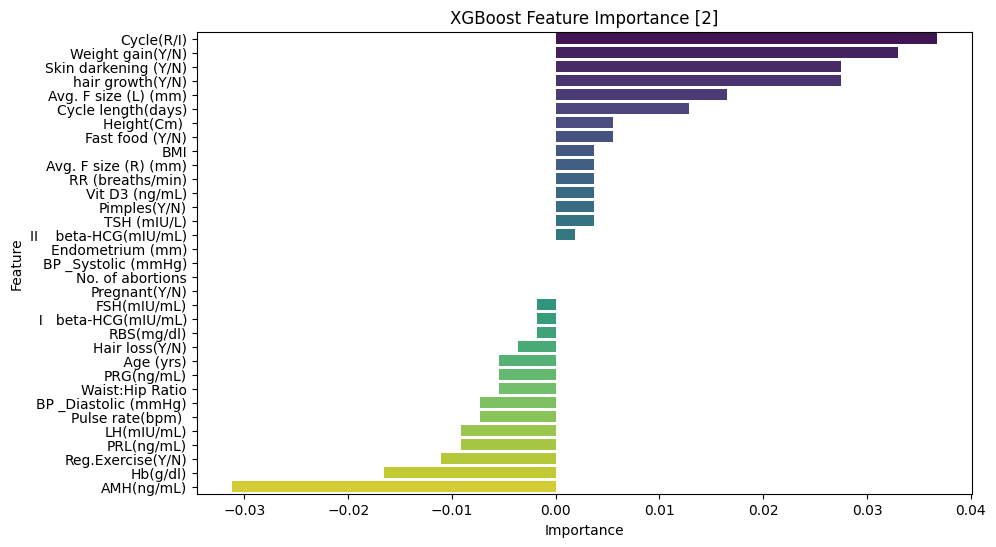

In [ ]:
perm_importance_xgb = permutation_importance(xgb_model, X_test, y_test)
xgb_perm_df = pd.DataFrame({"Feature": x.columns, "Importance": perm_importance_xgb.importances_mean})
xgb_perm_df = xgb_perm_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=xgb_perm_df, palette="viridis")
plt.title("XGBoost Feature Importance [2]")
plt.show()

## TESTING

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import pickle

# Load the dataset
pcos_data = pd.read_csv("outlier_r_pcos.csv")  # Replace with actual filename

# Select top 15 important features
top_15_features = [
    "hair growth(Y/N)", "Skin darkening (Y/N)", "Weight gain(Y/N)",
    "Cycle(R/I)", " Age (yrs)", "Avg. F size (L) (mm)", "Pimples(Y/N)",
    "II    beta-HCG(mIU/mL)", "  I   beta-HCG(mIU/mL)", "TSH (mIU/L)",
    "Weight (Kg)", "Cycle length(days)", "Pulse rate(bpm) ", "BMI",
    "Fast food (Y/N)"
]

# Define X and Y
X = pcos_data[top_15_features]
Y = pcos_data["PCOS (Y/N)"]  # Target variable

# Split into training and testing sets
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X, Y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train1_scaled = scaler.fit_transform(X_train1)
X_test1_scaled = scaler.transform(X_test1)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train1_scaled, Y_train1)

# Save the model and scaler using pickle
with open("l_regressor.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

print("Model trained and saved successfully!")


Model trained and saved successfully!


**Testing data**

In [ ]:
df = pd.read_csv('outlier_r_pcos.csv')

# Load the trained model and scaler
with open("l_regressor.pkl", "rb") as f:
    model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Define new sample data for testing (Top 15 features only)
new_data_dict = {
    'hair growth(Y/N)': 1,
    'Skin darkening (Y/N)': 0,
    'Weight gain(Y/N)': 1,
    'Cycle(R/I)': 2,
    'Age (yrs)': 25,
    'Avg. F size (L) (mm)': 14,
    'Pimples(Y/N)': 1,
    'II beta-HCG(mIU/mL)': 1.8,
    'I beta-HCG(mIU/mL)': 2.3,
    'TSH (mIU/L)': 2.5,
    'Weight (Kg)': 60,
    'Cycle length(days)': 30,
    'Pulse rate(bpm)': 75,
    'BMI': 22.5,
    'Fast food (Y/N)': 1
}

# Convert dictionary values to NumPy array
new_data = np.array([list(new_data_dict.values())])

# Standardize the input data
scaled_data = scaler.transform(new_data)

# Make prediction
prediction = model.predict(scaled_data)

# Display result
if prediction[0] == 1:
    print("🔴 Infected: PCOS detected")
else:
    print("🟢 Not Infected: No PCOS detected")


🟢 Not Infected: No PCOS detected


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Displaying risk score and feedback using streamlit

In [ ]:
!pip install streamlit ngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.5 MB/s eta 0:00:00


In [ ]:
%%writefile pcos_detector.py
import streamlit as st
import pickle
import numpy as np

# Load the trained model and scaler
with open("l_regressor.pkl", "rb") as f:
    model = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

# Streamlit UI
st.title("🔍 PCOS Early Detection")
st.write("Enter your health details to check for early warning signs of PCOS.")

# Input fields
hair_growth = st.selectbox("Excess Hair Growth (Yes/No)", [0, 1])
skin_darkening = st.selectbox("Skin Darkening (Yes/No)", [0, 1])
weight_gain = st.selectbox("Unexplained Weight Gain (Yes/No)", [0, 1])
cycle_regularity = st.selectbox("Irregular Menstrual Cycle (Yes/No)", [2, 4, 5])
age = st.number_input("Age (Years)", min_value=10, max_value=50, value=25)
avg_follicle_size_L = st.number_input("Average Follicle Size (Left) (mm)", min_value=0.0, max_value=30.0, value=14.0)
pimples = st.selectbox("Frequent Pimples (Yes/No)", [0, 1])
beta_HCG_II = st.number_input("II beta-HCG (mIU/mL)", min_value=0.0, value=1.8)
beta_HCG_I = st.number_input("I beta-HCG (mIU/mL)", min_value=0.0, value=2.3)
tsh = st.number_input("TSH (mIU/L)", min_value=0.0, value=2.5)
weight = st.number_input("Weight (Kg)", min_value=30.0, max_value=150.0, value=60.0)
cycle_length = st.number_input("Menstrual Cycle Length (Days)", min_value=0, max_value=60, value=30)
pulse_rate = st.number_input("Pulse Rate (bpm)", min_value=40, max_value=120, value=75)
bmi = st.number_input("BMI", min_value=10.0, max_value=40.0, value=22.5)
fast_food = st.selectbox("Frequent Fast Food Consumption (Yes/No)", [0, 1])

# Predict button
if st.button("Check for PCOS"):
    # Convert input to NumPy array
    new_data = np.array([[hair_growth, skin_darkening, weight_gain, cycle_regularity, age, avg_follicle_size_L,
                           pimples, beta_HCG_II, beta_HCG_I, tsh, weight, cycle_length, pulse_rate, bmi, fast_food]])

    # Standardize the input data
    scaled_data = scaler.transform(new_data)

    # Make prediction
    prediction = model.predict(scaled_data)

    # Display result
    if prediction[0] == 1:
        st.error("🔴 High Risk: PCOS Detected")
    else:
        st.success("🟢 Low Risk: No PCOS Detected")

Writing pcos_detector.py


In [ ]:
!streamlit run pcos_detector.py & npx localtunnel --port 8801



⠙⠹⠸⠼⠴⠦⠧⠇
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.45.150.159:8501

your url is: https://rich-nails-guess.loca.lt
2701
